In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import geopandas as gpd
import descartes
from shapely.geometry import Point , Polygon

import folium
from folium import plugins
import json


In [67]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import helper as H
import plot_helper as P

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# read 2 rows of the file before loading it
!head -2 ../data/incident_reports.csv

Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point
2018/01/01 09:26:00 AM,2018/01/01,09:26,2018,Monday,2018/01/01 09:27:00 AM,61893007041,618930,171052174,173641140,VS,Vehicle Supplement,,07041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,03RD ST \ HOLLISTER AVE,20471000,Southern,Bayview Hunters Point,10,37.72171587946975,-122.39594382884452,"(37.72171587946975, -122.39594382884452)"


In [4]:
police_df = pd.read_csv('../data/incident_reports.csv')

In [6]:
police_df.head(2)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point
0,2018/01/01 09:26:00 AM,2018/01/01,09:26,2018,Monday,2018/01/01 09:27:00 AM,61893007041,618930,171052174,173641140.0,...,"Vehicle, Recovered, Auto",Open or Active,03RD ST \ HOLLISTER AVE,20471000.0,Southern,Bayview Hunters Point,10.0,37.721716,-122.395944,"(37.72171587946975, -122.39594382884452)"
1,2018/01/01 02:30:00 AM,2018/01/01,02:30,2018,Monday,2018/01/01 08:21:00 AM,61893105041,618931,180000768,180010668.0,...,"Burglary, Residence, Forcible Entry",Open or Active,LISBON ST \ PERSIA AVE,21719000.0,Ingleside,Excelsior,11.0,37.722000,-122.433606,"(37.722000219874225, -122.43360633930074)"


In [7]:
# replace NaN values with 0
police_df= police_df.fillna(0)

In [17]:
unwanted= ['Incident Datetime', 'Report Type Code' , 'Report Type Description' , 'CAD Number' , 'CNN', 
                              'Supervisor District' , 'Resolution', 'Filed Online', 'Incident Number',
                              'Incident Code' , 'Police District']
extract= H.extract_df(police_df, unwanted)

In [18]:
extract.head(2)

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,2018/01/01,09:26,2018,Monday,2018/01/01 09:27:00 AM,61893007041,618930,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",03RD ST \ HOLLISTER AVE,Bayview Hunters Point,37.721716,-122.395944,"(37.72171587946975, -122.39594382884452)"
1,2018/01/01,02:30,2018,Monday,2018/01/01 08:21:00 AM,61893105041,618931,Burglary,Burglary - Residential,"Burglary, Residence, Forcible Entry",LISBON ST \ PERSIA AVE,Excelsior,37.722000,-122.433606,"(37.722000219874225, -122.43360633930074)"


In [20]:
extract = H.to_datetime(extract,'Incident Date' , 'Incident Time')

In [21]:
extract.head(2)

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,2018-01-01,1900-01-01 09:26:00,2018,Monday,2018/01/01 09:27:00 AM,61893007041,618930,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",03RD ST \ HOLLISTER AVE,Bayview Hunters Point,37.721716,-122.395944,"(37.72171587946975, -122.39594382884452)"
1,2018-01-01,1900-01-01 02:30:00,2018,Monday,2018/01/01 08:21:00 AM,61893105041,618931,Burglary,Burglary - Residential,"Burglary, Residence, Forcible Entry",LISBON ST \ PERSIA AVE,Excelsior,37.722000,-122.433606,"(37.722000219874225, -122.43360633930074)"


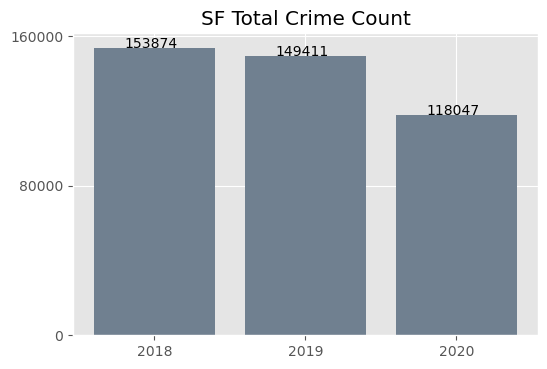

In [58]:
H.plot_crime_per_year(extract, [2018,2019, 2020], 'Incident Year');

In [61]:
df_2018 = H.crime_per_year(extract, 2018, 'Incident Year')

In [65]:
df_2019 = H.crime_per_year(extract , 2019, 'Incident Year')

In [66]:
df_2020 = H.crime_per_year(extract , 2020, 'Incident Year')